# TransGuard:
## Predictive modeling for Transaction Fraud Detection Using ML

## Name : Abhinand K V
## Organization : EntryElevate
## Submission date : 01/07/2024

## Table Contents


### 1. Overview of Problem Statement
### 2. Objective
### 3.Data Collection
### 4. Data Description
### 5. EDA
### 6. Data Preprocessing
### 7. Visualization
### 8. Feature Engineering
### 9. Data Spliting
### 10.Model Selection
### 11.Model Training & Evaluation
### 12.Feature Selection
### 13.Model Evaluation
### 14.Hyperparameter Tuning
### 15.Result
### 16.Model Deployment
### 17.Limitation
### 18.Conclusion
### 19.Future Works


# 1.Overview of Problem Statement

### Financial fraud poses a significant threat to financial institutions and consumers, causing substantial monetary losses and undermining trust. This project aims to develop a machine learning model to identify and prevent fraudulent financial transactions, enhancing security and reducing financial harm.

# 2.Objective


### Create a model that accurately detects fraudulent transactions

# 3.Data Collection

In [4]:
# Ignore warninggs
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
df=pd.read_csv('C:\\Users\\abhin\\OneDrive\\Desktop\\my project\\synthetic_financial_data.csv')
df

,transaction_id,customer_id,merchant_id,amount,transaction_time,is_fraudulent,card_type,location,purchase_category,customer_age,transaction_description
0,1,1082,2027,5758.59,2023-01-01 00:00:00,0,MasterCard,City-30,Gas Station,43,Purchase at Merchant-2027
1,2,1015,2053,1901.56,2023-01-01 00:00:01,1,Visa,City-47,Online Shopping,61,Purchase at Merchant-2053
2,3,1004,2035,1248.86,2023-01-01 00:00:02,1,MasterCard,City-6,Gas Station,57,Purchase at Merchant-2035
3,4,1095,2037,7619.05,2023-01-01 00:00:03,1,Discover,City-6,Travel,59,Purchase at Merchant-2037
4,5,1036,2083,1890.10,2023-01-01 00:00:04,1,MasterCard,City-34,Retail,36,Purchase at Merchant-2083
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1056,2023,8935.28,2023-01-01 02:46:35,1,MasterCard,City-39,Restaurant,36,Purchase at Merchant-2023
9996,9997,1053,2026,30.15,2023-01-01 02:46:36,0,MasterCard,City-32,Retail,42,Purchase at Merchant-2026
9997,9998,1041,2034,6333.64,2023-01-01 02:46:37,0,American Express,City-1,Online Shopping,36,Purchase at Merchant-2034
9998,9999,1009,2019,2837.13,2023-01-01 02:46:38,1,Visa,City-11,Retail,57,Purchase at Merchant-2019


# 4 Data Description

## The dataset used in this project contains synthetic financial transaction data designed for fraud analysis. 
## The dataset contains 11 columns of information for 10000 rows of data
## It includes the following features:

### 1.transaction_id: Unique identifier for each transaction.
### 2.customer_id: Unique identifier for each customer.
### 3.merchant_id: Unique identifier for each merchant.
### 4.amount: The transaction amount.
### 5.transaction_time: Timestamp of the transaction.
### 6.is_fraudulent: Indicator of whether the transaction is fraudulent (1) or not (0).
### 7.card_type: Type of card used (e.g., Visa, MasterCard).
### 8.location: Location of the transaction.
### 9.purchase_category: Category of the purchase (e.g., Gas Station, Online Shopping).
### 10.customer_age: Age of the customer.
### 11.transaction_description: Description of the transaction.
    
### This dataset is available  at Kaggle.
### data:https://www.kaggle.com/datasets/isabbaggin/transaction-fraudulent-financial-syntheticdata/data`

# 5 EDA

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [7]:
df

,transaction_id,customer_id,merchant_id,amount,transaction_time,is_fraudulent,card_type,location,purchase_category,customer_age,transaction_description
0,1,1082,2027,5758.59,2023-01-01 00:00:00,0,MasterCard,City-30,Gas Station,43,Purchase at Merchant-2027
1,2,1015,2053,1901.56,2023-01-01 00:00:01,1,Visa,City-47,Online Shopping,61,Purchase at Merchant-2053
2,3,1004,2035,1248.86,2023-01-01 00:00:02,1,MasterCard,City-6,Gas Station,57,Purchase at Merchant-2035
3,4,1095,2037,7619.05,2023-01-01 00:00:03,1,Discover,City-6,Travel,59,Purchase at Merchant-2037
4,5,1036,2083,1890.10,2023-01-01 00:00:04,1,MasterCard,City-34,Retail,36,Purchase at Merchant-2083
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1056,2023,8935.28,2023-01-01 02:46:35,1,MasterCard,City-39,Restaurant,36,Purchase at Merchant-2023
9996,9997,1053,2026,30.15,2023-01-01 02:46:36,0,MasterCard,City-32,Retail,42,Purchase at Merchant-2026
9997,9998,1041,2034,6333.64,2023-01-01 02:46:37,0,American Express,City-1,Online Shopping,36,Purchase at Merchant-2034
9998,9999,1009,2019,2837.13,2023-01-01 02:46:38,1,Visa,City-11,Retail,57,Purchase at Merchant-2019


In [8]:
# To get the dimension of the dataset
df.shape

(10000, 11)

###  there are 10000 rows and 11 colomns in this data set.


In [9]:
# To get the concise summary of a Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           10000 non-null  int64  
 1   customer_id              10000 non-null  int64  
 2   merchant_id              10000 non-null  int64  
 3   amount                   10000 non-null  float64
 4   transaction_time         10000 non-null  object 
 5   is_fraudulent            10000 non-null  int64  
 6   card_type                10000 non-null  object 
 7   location                 10000 non-null  object 
 8   purchase_category        10000 non-null  object 
 9   customer_age             10000 non-null  int64  
 10  transaction_description  10000 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 859.5+ KB


In [10]:
# columns
df.columns

Index(['transaction_id', 'customer_id', 'merchant_id', 'amount',
       'transaction_time', 'is_fraudulent', 'card_type', 'location',
       'purchase_category', 'customer_age', 'transaction_description'],
      dtype='object')

In [11]:

# Convert 'transaction_time' column to datetime
df['transaction_time'] = pd.to_datetime(df['transaction_time'])

In [12]:
# Data types of each columns in the dataframe
df.dtypes

transaction_id                      int64
customer_id                         int64
merchant_id                         int64
amount                            float64
transaction_time           datetime64[ns]
is_fraudulent                       int64
card_type                          object
location                           object
purchase_category                  object
customer_age                        int64
transaction_description            object
dtype: object

## Identify numerical and categorical colums

In [13]:
# Numerical columns
num_cols = df.select_dtypes(include='int').columns
print(num_cols)

Index(['transaction_id', 'customer_id', 'merchant_id', 'is_fraudulent',
       'customer_age'],
      dtype='object')


In [14]:
# Categorical columns
cat_cols = df.select_dtypes(include=['object','datetime']).columns
print(cat_cols)

Index(['transaction_time', 'card_type', 'location', 'purchase_category',
       'transaction_description'],
      dtype='object')


#### out of 11 column 5 columns are numerics and 6 column are categorical

## Checking for null values

In [15]:
# finding missing values
df.isnull().sum()

transaction_id             0
customer_id                0
merchant_id                0
amount                     0
transaction_time           0
is_fraudulent              0
card_type                  0
location                   0
purchase_category          0
customer_age               0
transaction_description    0
dtype: int64

#### no null values in this dataset

## Checking for duplicates


In [16]:
#finding duplicates
df.duplicated().sum()

0

### There are no duplicate values



## Understand the distribution of data


In [17]:
# Statistical summary
df.describe().T

,count,mean,min,25%,50%,75%,max,std
transaction_id,10000.0,5000.5,1.0,2500.75,5000.5,7500.25,10000.0,2886.89568
customer_id,10000.0,1051.2723,1001.0,1026.0,1052.0,1076.0,1100.0,28.864062
merchant_id,10000.0,2050.4866,2001.0,2025.0,2050.0,2076.0,2100.0,28.877801
amount,10000.0,4958.381617,10.61,2438.175,4943.945,7499.3125,9999.75,2899.699675
transaction_time,10000,2023-01-01 01:23:19.500000256,2023-01-01 00:00:00,2023-01-01 00:41:39.750000128,2023-01-01 01:23:19.500000,2023-01-01 02:04:59.249999872,2023-01-01 02:46:39,NaN
is_fraudulent,10000.0,0.5068,0.0,0.0,1.0,1.0,1.0,0.499979
customer_age,10000.0,44.0475,18.0,31.0,44.0,57.0,70.0,15.321707


In [18]:
# statistical summary of columns with data type 'object'
df.describe(include='object').T

,count,unique,top,freq
card_type,10000,4,Discover,2633
location,10000,50,City-7,223
purchase_category,10000,6,Travel,1694
transaction_description,10000,100,Purchase at Merchant-2016,120


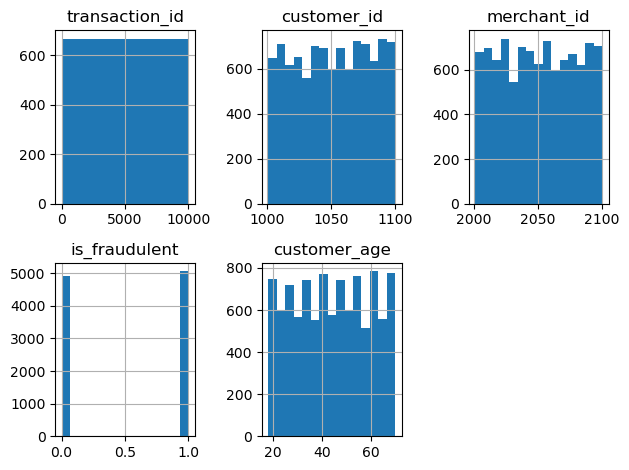

In [19]:
#Histograms for numerical columns
df[num_cols].hist(bins=15,layout=(2,3))
plt.tight_layout()
plt.show()

#### transaction_id shows a uniform distribution. customer_id and merchant_id have relatively uniform distributions with some variations.is_fraudulent is heavily skewed towards non-fraudulent transactions. customer_age shows a relatively uniform distribution across the specified age range.`

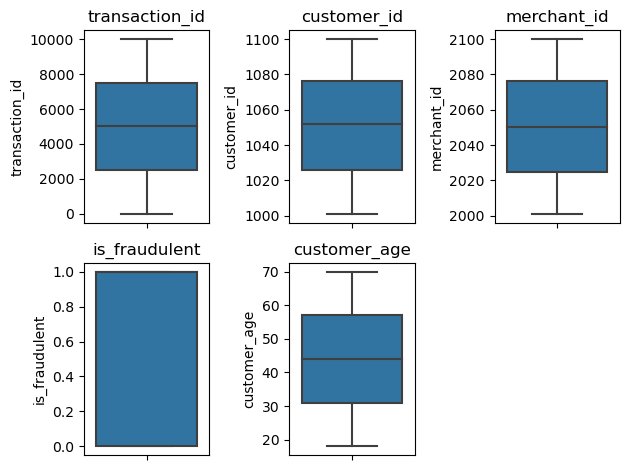

In [20]:
#box plotto identify outliers
plt.figure()
#enumerate() is a built in python function that allows you to loop over an iterable (like a list) and have an automatic counter.
for i, col in enumerate(num_cols):
    plt.subplot(2,3,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

#### transaction_id, customer_id, and merchant_id show relatively uniform distributions without outliers.is_fraudulent is a binary variable, so the box plot simply reflects the two possible values.customer_age shows an even distribution with no outliers, covering a range from 20 to 70 years.

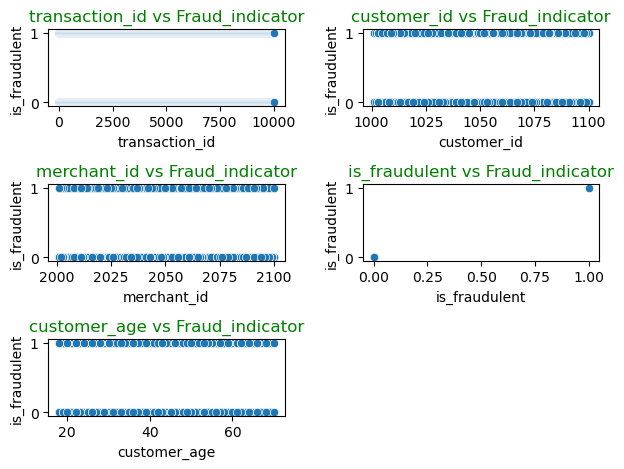

In [21]:
# scatter plot to identify the relationship between dependent (Fraud_indicator) and the undependent featues
plt.figure()

# Loop through each numerical column to create scatter plots
for i, col in enumerate(num_cols):
    plt.subplot(3,2,i+1)
    sns.scatterplot(data=df,x=col,y='is_fraudulent')
    plt.xlabel(col)
    plt.title(f'{col} vs Fraud_indicator',color= 'green')
plt.tight_layout()
plt.show()

#### All scatter plots indicate that fraudulent transactions (is_fraudulent = 1) are rare compared to non-fraudulent ones (is_fraudulent = 0).Fraudulent transactions are sparsely distributed across different ranges of transaction_id, customer_id, merchant_id, and customer_age.The plot of is_fraudulent against itself is redundant and does not provide new information.

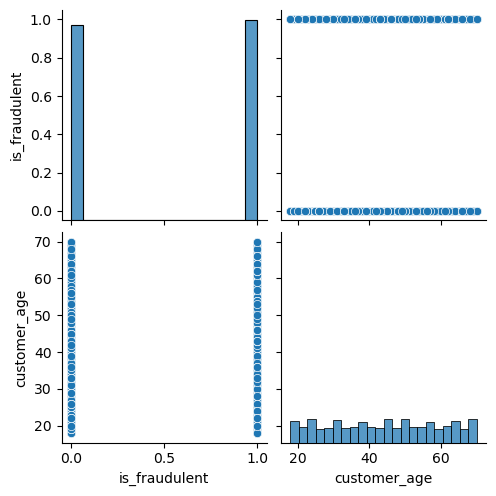

In [22]:
#To identify the relationship between the target(denpendent variable 'Fraud_indicator' and indepndent numerical values) 
sns.pairplot(df, vars=['is_fraudulent','customer_age',])
plt.show()

### Skewness and Kurtosis

In [23]:
from scipy.stats import skew, kurtosis

#claculate skewness and kurtosis
skewness = df[num_cols].apply(skew)
kurt = df[num_cols].apply(lambda x: kurtosis(x,fisher=False))

print(skewness)
print(kurt)

#Identify positive and negative skewness (absolute value>1)
positive_skewness = skewness[skewness > 1]
negative_skewness = skewness[skewness < -1]

print('variable with positive skewness (skew > 1):\n', positive_skewness)
print('variable with negative skewness (skew < -1):\n', negative_skewness)

# Identify the platykurtic (kurtosis < 3) and leptokurtic (kurtosis > 3) distributions
platykurtic = kurt[kurt < 3]
leptokurtic = kurt[kurt > 3]

print('variables with platykurtic distribution (kurtosis < 3):\n', platykurtic)
print('variables with leptokurtic distribution (kurtosis > 3):\n', leptokurtic)

transaction_id    0.000000
customer_id      -0.031479
merchant_id       0.011543
is_fraudulent    -0.027203
customer_age     -0.003143
dtype: float64
transaction_id    1.800000
customer_id       1.789850
merchant_id       1.793677
is_fraudulent     1.000740
customer_age      1.802743
dtype: float64
variable with positive skewness (skew > 1):
 Series([], dtype: float64)
variable with negative skewness (skew < -1):
 Series([], dtype: float64)
variables with platykurtic distribution (kurtosis < 3):
 transaction_id    1.800000
customer_id       1.789850
merchant_id       1.793677
is_fraudulent     1.000740
customer_age      1.802743
dtype: float64
variables with leptokurtic distribution (kurtosis > 3):
 Series([], dtype: float64)


#### Skewness:
#### The numerical features in the dataset exhibit relatively symmetrical distributions.None of the features show significant skewness (i.e., absolute skewness value greater than 1).This suggests that the data is not heavily skewed and does not require extensive normalization.
#### Kurtosis:
#### All numerical features have kurtosis values less than 3.A kurtosis value less than 3 indicates platykurtic distributions.Platykurtic distributions have lighter tails and flatter peaks compared to a normal distribution.Implications for Model Building:Given the low skewness and platykurtic nature of the distributions:
#### Normalization: The data does not require extensive normalization.

### Correlation

<Axes: >

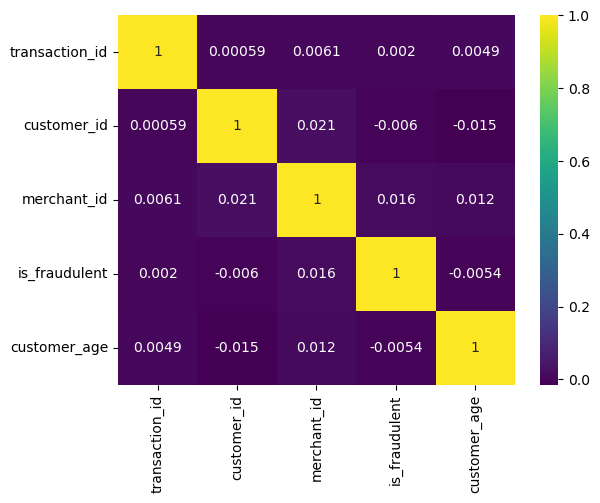

In [24]:
# correlation with heatmap to interpret the relation and multicollinarity
plt.figure()
sns.heatmap(df[num_cols].corr(),annot=True,cmap = 'viridis')

#### Overall, the heatmap suggests that there are no strong correlations among the variables.

### Analysing Categorical columns

In [25]:
for col in cat_cols:
    print(f'Values in {col}:\n{df[col].unique()}')
    print(f'Number of unique values in {col}: {df[col].nunique()}\n')
    print("====================================================================================")

Values in transaction_time:
<DatetimeArray>
['2023-01-01 00:00:00', '2023-01-01 00:00:01', '2023-01-01 00:00:02',
 '2023-01-01 00:00:03', '2023-01-01 00:00:04', '2023-01-01 00:00:05',
 '2023-01-01 00:00:06', '2023-01-01 00:00:07', '2023-01-01 00:00:08',
 '2023-01-01 00:00:09',
 ...
 '2023-01-01 02:46:30', '2023-01-01 02:46:31', '2023-01-01 02:46:32',
 '2023-01-01 02:46:33', '2023-01-01 02:46:34', '2023-01-01 02:46:35',
 '2023-01-01 02:46:36', '2023-01-01 02:46:37', '2023-01-01 02:46:38',
 '2023-01-01 02:46:39']
Length: 10000, dtype: datetime64[ns]
Number of unique values in transaction_time: 10000

Values in card_type:
['MasterCard' 'Visa' 'Discover' 'American Express']
Number of unique values in card_type: 4

Values in location:
['City-30' 'City-47' 'City-6' 'City-34' 'City-1' 'City-7' 'City-46'
 'City-45' 'City-25' 'City-29' 'City-19' 'City-13' 'City-4' 'City-17'
 'City-35' 'City-40' 'City-38' 'City-22' 'City-39' 'City-10' 'City-15'
 'City-44' 'City-27' 'City-37' 'City-50' 'City-18' 

#### Number of unique values in transaction_time: 10000,Number of unique values in card_type: 4,Number of unique values in location: 50,Number of unique values in purchase_category: 6,Number of unique values in transaction_description: 100

In [26]:
for col in cat_cols:
    cross_tab = pd.crosstab(df['is_fraudulent'], df[col])
    print(f'Cross Tabulation between {col} and is_fraudulent:')
    print(cross_tab)
    print('\n')
    print("====================================================================================")

Cross Tabulation between transaction_time and is_fraudulent:
transaction_time  2023-01-01 00:00:00  2023-01-01 00:00:01  \
is_fraudulent                                                
0                                   1                    0   
1                                   0                    1   

transaction_time  2023-01-01 00:00:02  2023-01-01 00:00:03  \
is_fraudulent                                                
0                                   0                    0   
1                                   1                    1   

transaction_time  2023-01-01 00:00:04  2023-01-01 00:00:05  \
is_fraudulent                                                
0                                   0                    0   
1                                   1                    1   

transaction_time  2023-01-01 00:00:06  2023-01-01 00:00:07  \
is_fraudulent                                                
0                                   0                    1   
1     

In [27]:
pd.crosstab(df["card_type"], df["is_fraudulent"], margins=True)

is_fraudulent,0,1,All
card_type,,,
American Express,1262,1232,2494
Discover,1304,1329,2633
MasterCard,1140,1243,2383
Visa,1226,1264,2490
All,4932,5068,10000


In [28]:
pd.crosstab(df["purchase_category"], df["is_fraudulent"], margins=True)

is_fraudulent,0,1,All
purchase_category,,,
Gas Station,792,874,1666
Groceries,796,896,1692
Online Shopping,847,804,1651
Restaurant,851,785,1636
Retail,808,853,1661
Travel,838,856,1694
All,4932,5068,10000


In [29]:
pd.crosstab(df["location"], df["is_fraudulent"], margins=True)

is_fraudulent,0,1,All
location,,,
City-1,80,108,188
City-10,100,94,194
City-11,92,107,199
City-12,102,107,209
City-13,99,110,209
City-14,106,112,218
City-15,96,88,184
City-16,92,94,186
City-17,109,96,205


In [30]:
pd.crosstab(df["customer_age"], df["is_fraudulent"], margins=True)

is_fraudulent,0,1,All
customer_age,,,
18,86,87,173
19,99,105,204
20,84,94,178
21,104,90,194
22,101,99,200
23,97,104,201
24,77,119,196
25,106,102,208
26,84,83,167


#### This tables helps us to understand the distribution of Fraud_indicator across card_type,purchase_category,location,customer_age
#### The columns represent whether the transaction is fraud or not.
#### The rows represent the card_type,purchase_category,location,customer_age  respectively.

## 6. Data Preprocessing

In [31]:
df1 = df.copy()
df1.shape

(10000, 11)

In [32]:
df1.columns

Index(['transaction_id', 'customer_id', 'merchant_id', 'amount',
       'transaction_time', 'is_fraudulent', 'card_type', 'location',
       'purchase_category', 'customer_age', 'transaction_description'],
      dtype='object')

### Remove unnecessary columns

In [33]:
df1.drop(['transaction_id','customer_id', 'merchant_id','transaction_time','transaction_description'],axis = 1, inplace = True)
df1.shape

(10000, 6)

In [34]:
num_cols = df1.select_dtypes(include='int').columns
print(num_cols)

Index(['is_fraudulent', 'customer_age'], dtype='object')


In [35]:
df1.isnull().sum()

amount               0
is_fraudulent        0
card_type            0
location             0
purchase_category    0
customer_age         0
dtype: int64

### 'is_fraudulent' is the target variable. Since there are no null values, missing value treatment is not needed. However, outlier treatment is necessary as it may affect the model.

## 7. Visualization


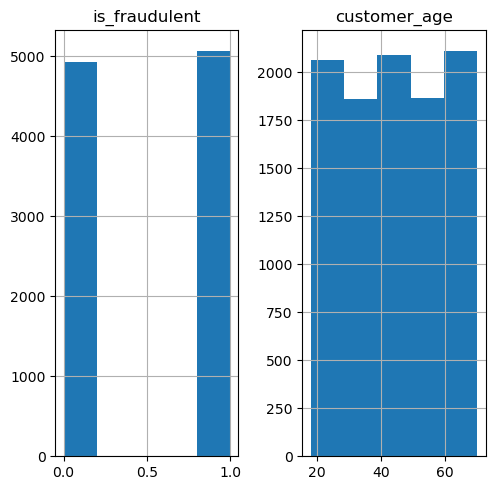

In [36]:
# Histograms for numerical columns after outlier treatment
df1[num_cols].hist(bins= 5, figsize=(10,5), layout=(1,4))
plt.tight_layout()
plt.show()

##### 1. The first histogram shows the distribution of the is_fraudulent variable, indicating that fraudulent and non-fraudulent transactions are approximately equal in frequency, each with about 5000 instances.
   
##### 2. The second histogram shows the customer_age distribution, which is relatively uniform across the age range of 18 to 70, with each age bin containing around 2000 customers.

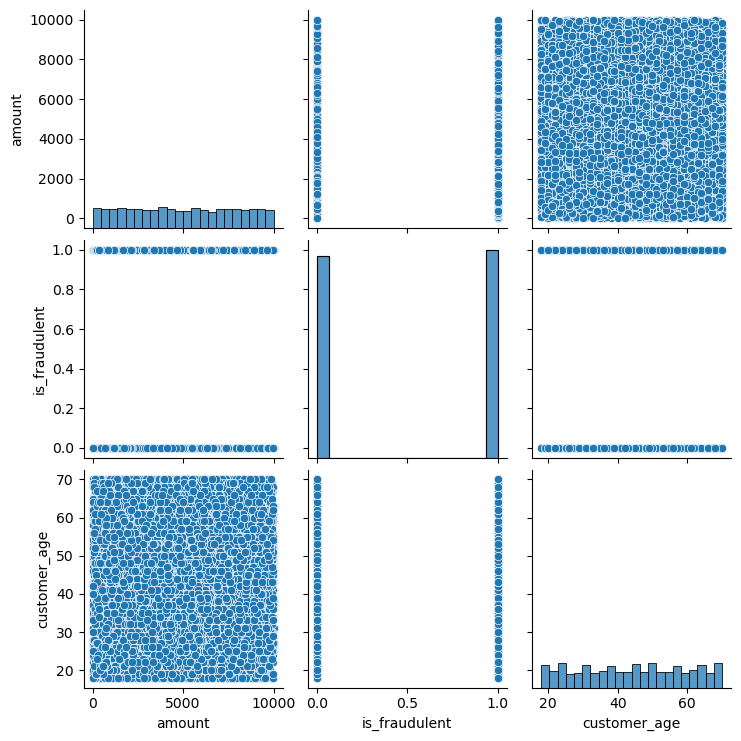

In [37]:
# pairplot - To visualize relationship between multiple pairs of variables
sns.pairplot(df1)

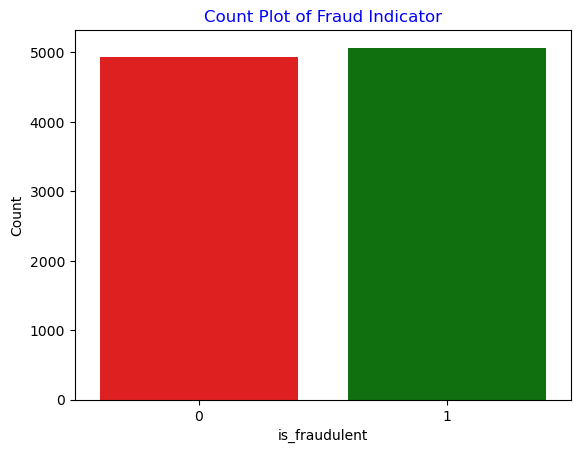

In [38]:
sns.countplot(data=df,x='is_fraudulent',palette=['red','green'])
plt.title('Count Plot of Fraud Indicator',color='blue')
plt.xlabel('is_fraudulent')
plt.ylabel('Count')
plt.show()

##### The bar chart titled "Count Plot of Fraud Indicator" shows that the dataset has a nearly equal number of non-fraudulent (red) and fraudulent (green) transactions, each with around 5000 instances.

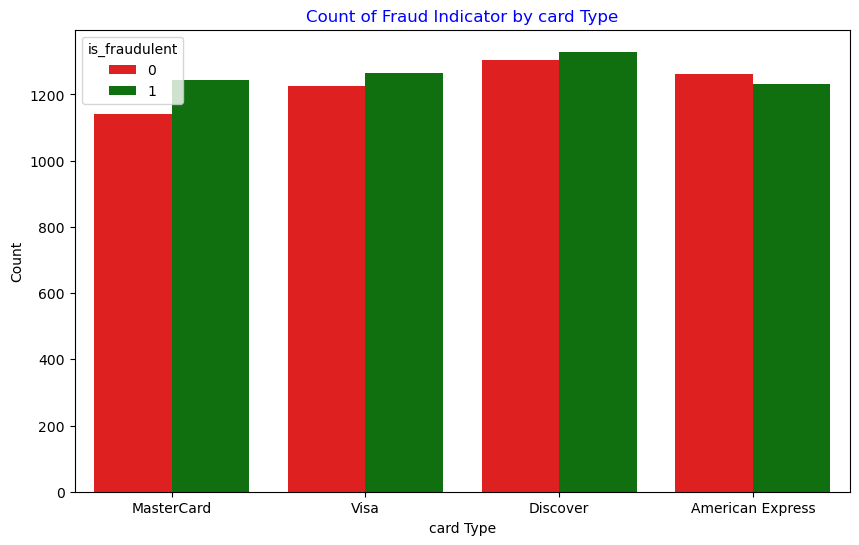

In [86]:
# Barplot - Compare fraud indicator counts for vehicle types
plt.figure(figsize=(10,6))
sns.countplot(data=df1, x='card_type', hue='is_fraudulent',palette=('red','green'))
plt.title('Count of Fraud Indicator by card Type',color='blue')
plt.ylabel('Count')
plt.xlabel('card Type')
plt.legend(title='is_fraudulent')
plt.show()

##### The bar chart titled "Count of Fraud Indicator by card Type" shows the distribution of fraudulent (green) and non-fraudulent (red) transactions across different card types: MasterCard, Visa, Discover, and American Express. Each card type has nearly equal counts of fraudulent and non-fraudulent transactions, with counts ranging around 1000 to 1200 per category.

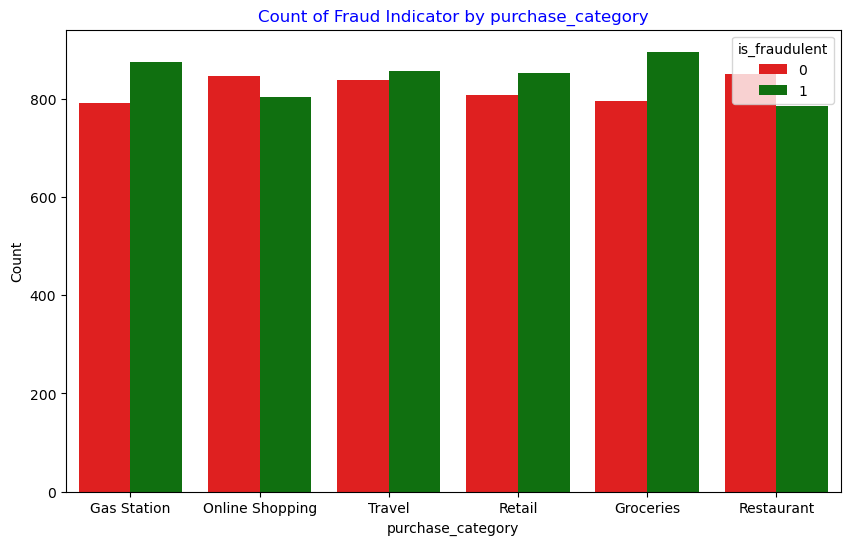

In [87]:
# Barplot - Compare fraud indicator counts for  purchase_category
plt.figure(figsize=(10,6))
sns.countplot(data=df1, x='purchase_category', hue='is_fraudulent',palette=('red','green'))
plt.title('Count of Fraud Indicator by purchase_category',color='blue')
plt.ylabel('Count')
plt.xlabel('purchase_category')
plt.legend(title='is_fraudulent')
plt.show()

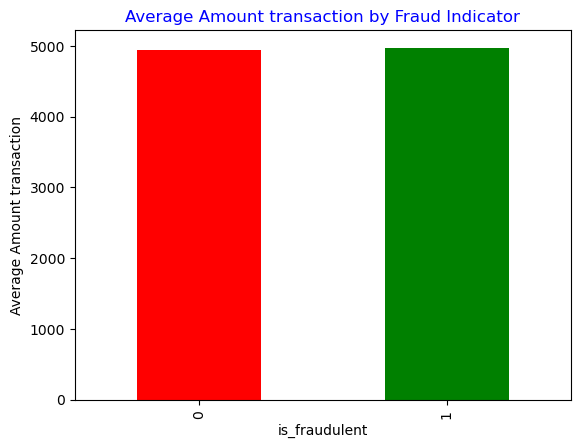

In [41]:
# Barplot - Compare mean amount paid for fraud indicator
mean_amount_paid = df1.groupby('is_fraudulent')['amount'].mean()

# Plotting
mean_amount_paid.plot(kind='bar', color=['red', 'green'])
plt.title('Average Amount transaction by Fraud Indicator',color = 'blue')
plt.ylabel('Average Amount transaction')
plt.xlabel('is_fraudulent')
plt.show()

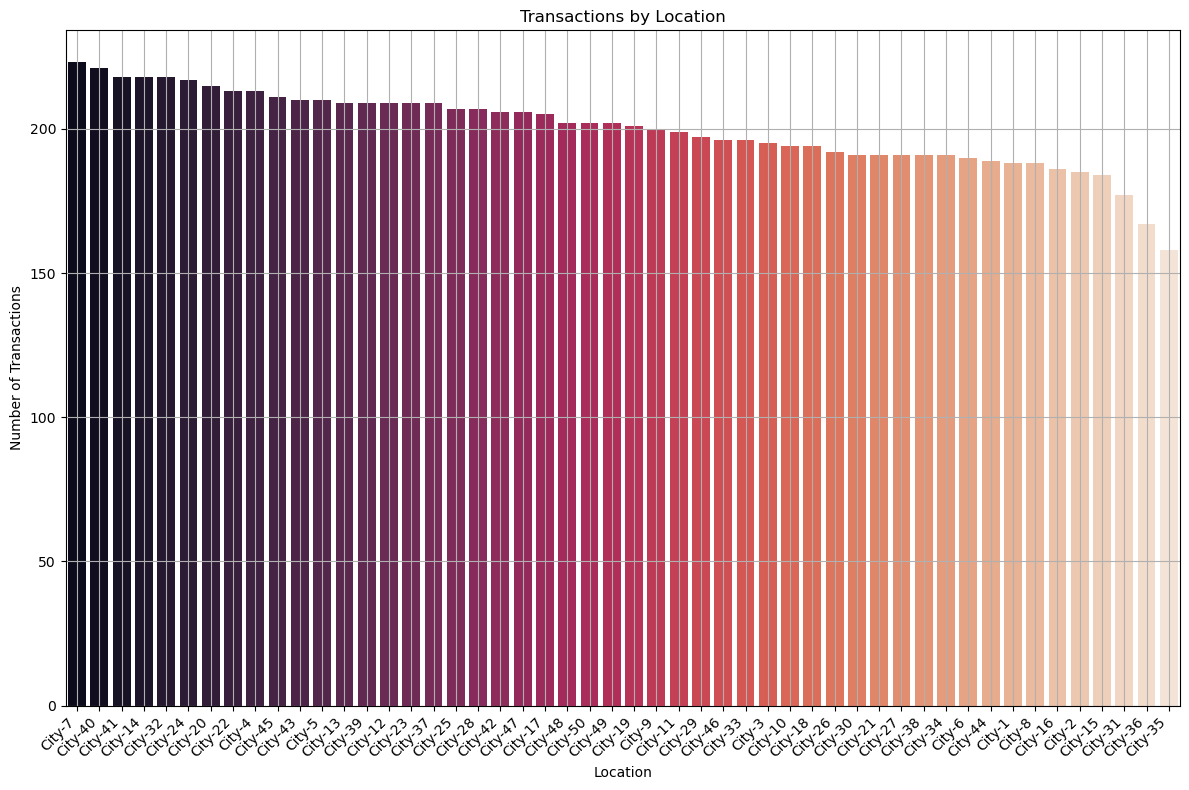

In [42]:
# bar chart to visualize the number of transactions per location

transactions_per_location = df['location'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=transactions_per_location.index, y=transactions_per_location.values, palette='rocket')
plt.title('Transactions by Location')
plt.xlabel('Location')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

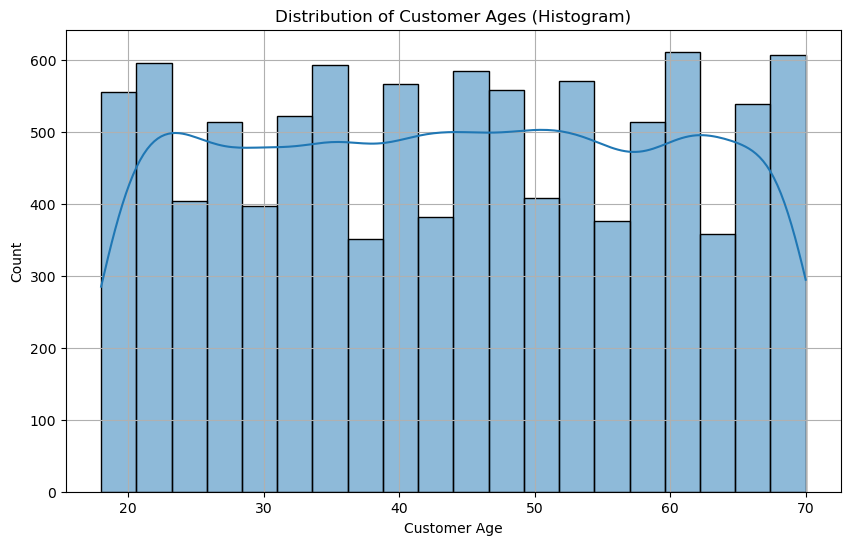

In [85]:
# Histogram to visualize the distribution of customer 
plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x='customer_age', bins=20, kde=True)
plt.title('Distribution of Customer Ages (Histogram)')
plt.xlabel('Customer Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()

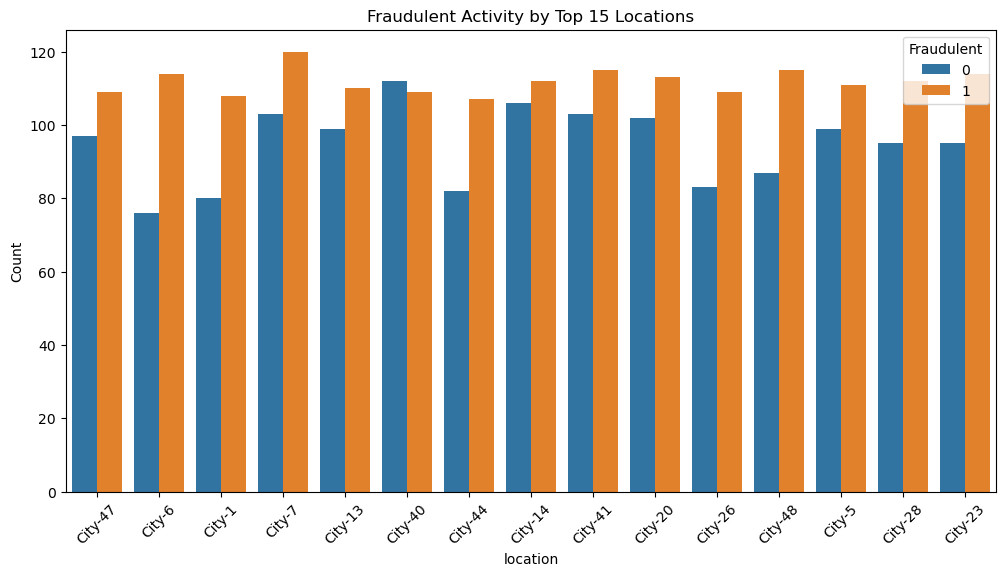

In [44]:
top_15_locations = df[df['is_fraudulent'] == 1]['location'].value_counts().nlargest(15).index.sort_values(ascending=True)

plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['location'].isin(top_15_locations)], x='location', hue='is_fraudulent')
plt.xlabel('location')
plt.ylabel('Count')
plt.title('Fraudulent Activity by Top 15 Locations')
plt.legend(title='Fraudulent', loc='upper right')
plt.xticks(rotation=45)
plt.show()

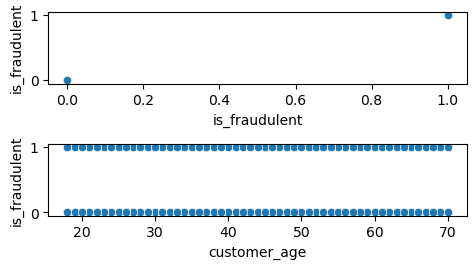

In [45]:
# scatter plot to identify the relationship between dependent (Fraud_indicator) and the independent variables
plt.figure(figsize=(5,5))
for i, col in enumerate(num_cols):
    plt.subplot(4,1, i+1)
    sns.scatterplot(data=df1,x=col,y='is_fraudulent')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

<Axes: >

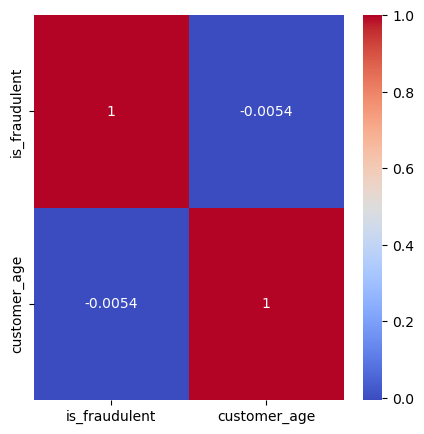

In [46]:
plt.figure(figsize=(5,5))
sns.heatmap(df1[num_cols].corr(),annot=True, cmap = 'coolwarm')

## 8. Feature Engineering
### Encode categorical features to numerical values using techniques like one-hot encoding for nominal data,This prepares the data for machine learning algorithms..

In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   amount             10000 non-null  float64
 1   is_fraudulent      10000 non-null  int64  
 2   card_type          10000 non-null  object 
 3   location           10000 non-null  object 
 4   purchase_category  10000 non-null  object 
 5   customer_age       10000 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 468.9+ KB


In [48]:
df1.shape

(10000, 6)

In [49]:
import pandas as pd

df2= pd.DataFrame(df1)

# Ensuring all entries in 'location' are strings
df2['location'] = df2['location'].astype(str)

# Extracting numbers using str.extract and regular expressions
df2['city_number'] = df2['location'].str.extract(r'City-\s*(\d+)')

# Dropping the original 'location' column
df2.drop('location', axis=1, inplace=True)

print(df2)
df2

       amount  is_fraudulent         card_type purchase_category  \
0     5758.59              0        MasterCard       Gas Station   
1     1901.56              1              Visa   Online Shopping   
2     1248.86              1        MasterCard       Gas Station   
3     7619.05              1          Discover            Travel   
4     1890.10              1        MasterCard            Retail   
...       ...            ...               ...               ...   
9995  8935.28              1        MasterCard        Restaurant   
9996    30.15              0        MasterCard            Retail   
9997  6333.64              0  American Express   Online Shopping   
9998  2837.13              1              Visa            Retail   
9999  7209.43              1          Discover       Gas Station   

      customer_age city_number  
0               43          30  
1               61          47  
2               57           6  
3               59           6  
4               36

,amount,is_fraudulent,card_type,purchase_category,customer_age,city_number
0,5758.59,0,MasterCard,Gas Station,43,30
1,1901.56,1,Visa,Online Shopping,61,47
2,1248.86,1,MasterCard,Gas Station,57,6
3,7619.05,1,Discover,Travel,59,6
4,1890.10,1,MasterCard,Retail,36,34
...,...,...,...,...,...,...
9995,8935.28,1,MasterCard,Restaurant,36,39
9996,30.15,0,MasterCard,Retail,42,32
9997,6333.64,0,American Express,Online Shopping,36,1
9998,2837.13,1,Visa,Retail,57,11


In [50]:

df2 = pd.get_dummies(df2, columns=['purchase_category', 'card_type'])
df2

,amount,is_fraudulent,customer_age,city_number,purchase_category_Gas Station,purchase_category_Groceries,purchase_category_Online Shopping,purchase_category_Restaurant,purchase_category_Retail,purchase_category_Travel,card_type_American Express,card_type_Discover,card_type_MasterCard,card_type_Visa
0,5758.59,0,43,30,True,False,False,False,False,False,False,False,True,False
1,1901.56,1,61,47,False,False,True,False,False,False,False,False,False,True
2,1248.86,1,57,6,True,False,False,False,False,False,False,False,True,False
3,7619.05,1,59,6,False,False,False,False,False,True,False,True,False,False
4,1890.10,1,36,34,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8935.28,1,36,39,False,False,False,True,False,False,False,False,True,False
9996,30.15,0,42,32,False,False,False,False,True,False,False,False,True,False
9997,6333.64,0,36,1,False,False,True,False,False,False,True,False,False,False
9998,2837.13,1,57,11,False,False,False,False,True,False,False,False,False,True


In [51]:
# split the data into features (x) and target (y)
x = df2.drop(['is_fraudulent'], axis = 1)
y = df2['is_fraudulent']

x.head()

,amount,customer_age,city_number,purchase_category_Gas Station,purchase_category_Groceries,purchase_category_Online Shopping,purchase_category_Restaurant,purchase_category_Retail,purchase_category_Travel,card_type_American Express,card_type_Discover,card_type_MasterCard,card_type_Visa
0,5758.59,43,30,True,False,False,False,False,False,False,False,True,False
1,1901.56,61,47,False,False,True,False,False,False,False,False,False,True
2,1248.86,57,6,True,False,False,False,False,False,False,False,True,False
3,7619.05,59,6,False,False,False,False,False,True,False,True,False,False
4,1890.10,36,34,False,False,False,False,True,False,False,False,True,False


In [52]:
x.info

<bound method DataFrame.info of        amount  customer_age city_number  purchase_category_Gas Station  \
0     5758.59            43          30                           True   
1     1901.56            61          47                          False   
2     1248.86            57           6                           True   
3     7619.05            59           6                          False   
4     1890.10            36          34                          False   
...       ...           ...         ...                            ...   
9995  8935.28            36          39                          False   
9996    30.15            42          32                          False   
9997  6333.64            36           1                          False   
9998  2837.13            57          11                          False   
9999  7209.43            50           1                           True   

      purchase_category_Groceries  purchase_category_Online Shopping  \
0      

In [53]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming 'x' is your DataFrame with numerical features
# Scale the numerical features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Convert the result back to a DataFrame
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)
x_scaled.info

<bound method DataFrame.info of         amount  customer_age  city_number  purchase_category_Gas Station  \
0     0.275976     -0.068370     0.309127                       2.236605   
1    -1.054238      1.106492     1.485698                      -0.447106   
2    -1.279342      0.845411    -1.351915                       2.236605   
3     0.917613      0.975952    -1.351915                      -0.447106   
4    -1.058191     -0.525261     0.585967                      -0.447106   
...        ...           ...          ...                            ...   
9995  1.371555     -0.525261     0.932017                      -0.447106   
9996 -1.699651     -0.133641     0.447547                      -0.447106   
9997  0.474300     -0.525261    -1.697965                      -0.447106   
9998 -0.731578      0.845411    -1.005864                      -0.447106   
9999  0.776343      0.388521    -1.697965                       2.236605   

      purchase_category_Groceries  purchase_category_On

## 9. Data Splitting


In [54]:
# Splitting the dataset into 80-20 that is , 80% of the data is for training and 20% of the data is for testing

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 42)

## 10. Model Selection

### Models Selected: LogisticRegression, Random Forest, Decision Tree, Naive Bayes, SVC

## 11. Model Training & Evaluation

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Dictionary to hold the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'SVC': SVC(probability=True, random_state=42)
}

# Lists to store the evaluation metrics for each model
model_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_aucs = []

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    model_names.append(model_name)
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    roc_aucs.append(roc_auc_score(y_test, y_pred))
    
    print(f"Model: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
    print("\n")

# Summarize the evaluation metrics for all models in a DataFrame
results_df1 = pd.DataFrame({
    'Model-Name': model_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores,
    'ROC AUC': roc_aucs
})

# Check column names to ensure they are correct
print(results_df1.columns)

Model: Logistic Regression
Accuracy: 0.5345
Precision: 0.542809642560266
Recall: 0.6315280464216635
F1 Score: 0.5838176128743854
ROC AUC Score: 0.5310849341839166


Model: Random Forest
Accuracy: 0.4985
Precision: 0.5157041540020263
Recall: 0.4922630560928433
F1 Score: 0.5037110341415141
ROC AUC Score: 0.4987195197648482


Model: Decision Tree
Accuracy: 0.5
Precision: 0.5167652859960552
Recall: 0.5067698259187621
F1 Score: 0.51171875
ROC AUC Score: 0.4997617245535839


Model: Naive Bayes
Accuracy: 0.544
Precision: 0.552405498281787
Recall: 0.6218568665377177
F1 Score: 0.5850773430391266
ROC AUC Score: 0.5412596962088174


Model: SVC
Accuracy: 0.505
Precision: 0.5198198198198198
Recall: 0.558027079303675
F1 Score: 0.5382462686567164
ROC AUC Score: 0.5031336224675724


Index(['Model-Name', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'], dtype='object')


In [56]:
results_df1 = pd.DataFrame({"Model-Name":model_names, "Accuracy": accuracies, "Precision":precisions, "Recall":recalls, "F1 Score ":f1_scores,'ROC AUC':roc_aucs})
results_df1 = results_df1.set_index('Model-Name')
results_df1.sort_values("Accuracy", ascending = False)

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Model-Name,,,,,
Naive Bayes,0.5440,0.552405,0.621857,0.585077,0.541260
Logistic Regression,0.5345,0.542810,0.631528,0.583818,0.531085
SVC,0.5050,0.519820,0.558027,0.538246,0.503134
Decision Tree,0.5000,0.516765,0.506770,0.511719,0.499762
Random Forest,0.4985,0.515704,0.492263,0.503711,0.498720


### Naive Bayes appears to be the best-performing model based on accuracy, ROC AUC score, and recall, making it a suitable choice for fraud detection in this dataset.
### Logistic Regression also performs well, particularly in recall, which is crucial for fraud detection.
### Random Forest and Decision Tree models perform close to random chance and may not be ideal for this dataset.
### SVC shows moderate performance but does not surpass Naive Bayes or Logistic Regression.

# 12. Feature Selection

### Naive Bayes model in transaction fraud detection, you might consider starting with filter methods like the Chi-Square test or ANOVA for their simplicity and speed.

In [57]:
import pandas as pd
from sklearn.feature_selection import f_classif


# Perform ANOVA
f_values, p_values = f_classif(x, y)

# Create a DataFrame to hold the results
anova_results = pd.DataFrame({'Feature': x.columns, 'F-Value': f_values, 'p-Value': p_values})

# Sort by F-Value in descending order
anova_results = anova_results.sort_values(by='F-Value', ascending=False)

# Display the results
print(anova_results)

# Select features with p-value < 0.05
selected_features = anova_results[anova_results['p-Value'] < 0.05]['Feature']
print("\nSelected Features based on ANOVA p-value < 0.05:")
print(selected_features)


                              Feature   F-Value   p-Value
6        purchase_category_Restaurant  5.694675  0.017035
4         purchase_category_Groceries  4.218275  0.040017
5   purchase_category_Online Shopping  3.108952  0.077894
11               card_type_MasterCard  2.746034  0.097527
3       purchase_category_Gas Station  2.536912  0.111244
9          card_type_American Express  2.182906  0.139582
2                         city_number  0.521658  0.470152
7            purchase_category_Retail  0.362598  0.547081
1                        customer_age  0.290287  0.590049
0                              amount  0.265703  0.606240
10                 card_type_Discover  0.060230  0.806139
8            purchase_category_Travel  0.018042  0.893153
12                     card_type_Visa  0.009148  0.923805

Selected Features based on ANOVA p-value < 0.05:
6    purchase_category_Restaurant
4     purchase_category_Groceries
Name: Feature, dtype: object


### 2. Logistic Regression for RFE

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score



# Initialize the Logistic Regression model for RFE
log_reg = LogisticRegression(solver='liblinear')

# Apply RFE to select the top features
rfe = RFE(estimator=log_reg, n_features_to_select=2)
rfe = rfe.fit(x, y)

# Get the selected features
selected_features = x.columns[rfe.support_]

# Prepare the dataset with selected features
x_selected = x[selected_features]

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_selected, y, test_size=0.3, random_state=42)

# Initialize and train the Naive Bayes model
model = GaussianNB()
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print evaluation metrics and selected features
print(f'Accuracy: {accuracy:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Selected Features: {selected_features}')


Accuracy: 0.53
ROC AUC Score: 0.52
Recall: 0.70
Selected Features: Index(['purchase_category_Online Shopping', 'purchase_category_Restaurant'], dtype='object')


### Selected Features('purchase_category_Restaurant','purchase_category_Groceries','purchase_category_Online Shopping')

# 13. Model Evaluation


Model: Logistic Regression
Accuracy: 0.534
Precision: 0.5372262773722628
Recall: 0.7117988394584139
F1 Score: 0.6123128119800333
ROC AUC Score: 0.5367624974470487


Model: Random Forest
Accuracy: 0.534
Precision: 0.5372262773722628
Recall: 0.7117988394584139
F1 Score: 0.6123128119800333
ROC AUC Score: 0.5367624974470487


Model: Decision Tree
Accuracy: 0.534
Precision: 0.5372262773722628
Recall: 0.7117988394584139
F1 Score: 0.6123128119800333
ROC AUC Score: 0.5367624974470487


Model: Naive Bayes
Accuracy: 0.534
Precision: 0.5372262773722628
Recall: 0.7117988394584139
F1 Score: 0.6123128119800333
ROC AUC Score: 0.5367624974470487


Model: SVC
Accuracy: 0.534
Precision: 0.5372262773722628
Recall: 0.7117988394584139
F1 Score: 0.6123128119800333
ROC AUC Score: 0.5178266075583374




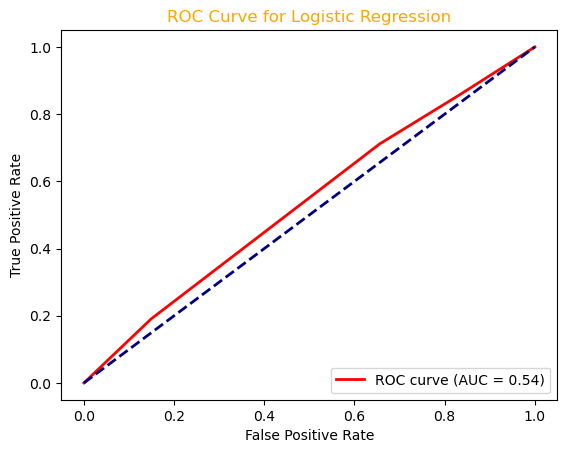

ROC curve for Logistic Regression plotted successfully.


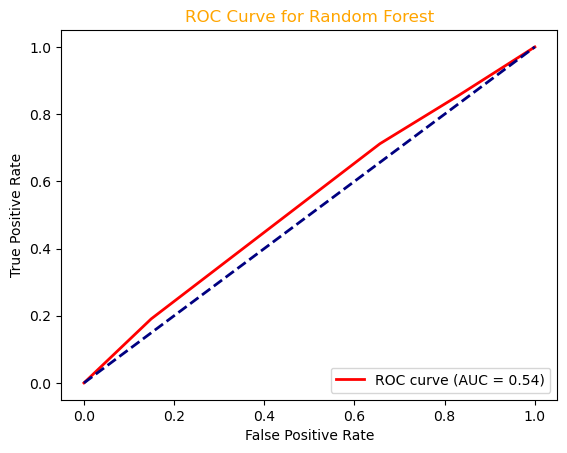

ROC curve for Random Forest plotted successfully.


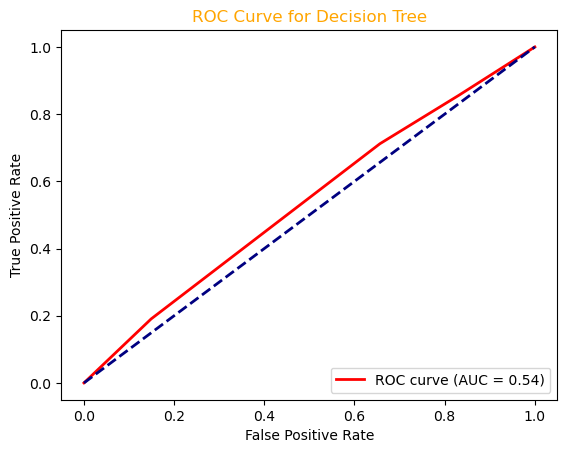

ROC curve for Decision Tree plotted successfully.


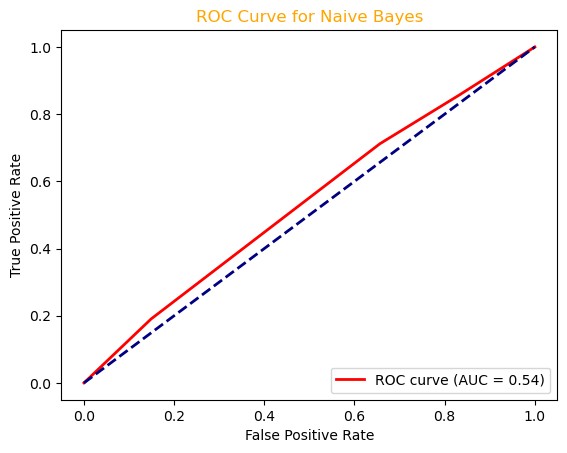

ROC curve for Naive Bayes plotted successfully.


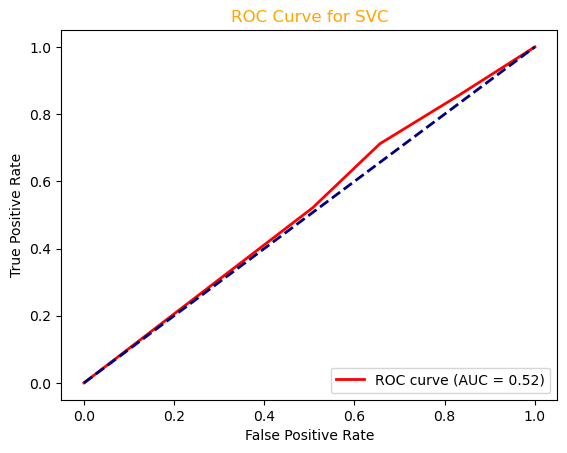

ROC curve for SVC plotted successfully.


In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

# Assuming 'x' and 'df1' are your dataframes
selected_features = ['purchase_category_Restaurant','purchase_category_Groceries','purchase_category_Online Shopping']

X = x[selected_features]
y = df1['is_fraudulent']

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to be trained
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'SVC': SVC(probability=True, random_state=42),
}

# Training and evaluation
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_prob = model.predict_proba(x_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    print(f"Model: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    if y_pred_prob is not None:
        print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))
    print("\n")

# Plotting ROC curves for each model
for model_name, model in models.items():
    if hasattr(model, 'predict_proba'):
        y_pred_prob = model.predict_proba(x_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = roc_auc_score(y_test, y_pred_prob)
        
        # Plot ROC curve
        plt.figure()
        plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {model_name}',color = 'orange')
        plt.legend(loc="lower right")
        plt.show()
        print(f"ROC curve for {model_name} plotted successfully.")
    else:
        print(f"{model_name} does not support predict_proba for ROC curve")

In [75]:
results_df1 = pd.DataFrame({"Model-Name":model_names, "Accuracy": accuracies, "Precision":precisions, "Recall":recalls, "F1 Score ":f1_scores,'ROC AUC':roc_aucs})
results_df1 = results_df1.set_index('Model-Name')
results_df1.sort_values("Accuracy", ascending = False)

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Model-Name,,,,,
Logistic Regression,0.534,0.537226,0.711799,0.612313,0.527742
Random Forest,0.534,0.537226,0.711799,0.612313,0.527742
Decision Tree,0.534,0.537226,0.711799,0.612313,0.527742
Naive Bayes,0.534,0.537226,0.711799,0.612313,0.527742


# 14. Hyperparameter Tuning


In [77]:
from sklearn.model_selection import GridSearchCV

# Define Hyperparameter Grids

# Logistic Regression
param_grid_lr ={
    'penalty':['l1','l2'],
    'C':[0.01, 0.1, 1, 10],
    'solver':['liblinear']
}

# Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth':[None, 10, 20, 30],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 2, 4],
    'bootstrap':[True, False]
}

# Decision Tree
param_grid_dt = {
    'max_depth':[None, 10, 20, 30],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 2, 4],
}

# Naive Bayes(no hyperparameter to tune for GaussianNB)

#SVC
param_grid_svc = {
    'C':[0.1, 1, 10],
    'gamma':[1, 0.1, 0.01],
    'kernel':['linear', 'rbf']
}

In [78]:
# Initialize models with default parameter

models = {
    'Logistic Regression': (LogisticRegression(), param_grid_lr),
    'Random Forest': (RandomForestClassifier(random_state=42), param_grid_rf),
    'Decision Tree': (DecisionTreeClassifier(random_state=42), param_grid_dt),
    'Naive Bayes': (GaussianNB(), None),
    'SVC': (SVC(probability=True, random_state=42), param_grid_svc),
}

In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Dictionary to hold the best models
best_models = {}

# Lists to store the evaluation metrics for each model
model_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_aucs = []

for model_name, (model, param_grid) in models.items():
    if param_grid is not None:
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='f1')
        grid_search.fit(x_train, y_train)
        best_model = grid_search.best_estimator_
        best_models[model_name] = best_model
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    else:
        # For models without hyperparameters to tune (like Naive Bayes)
        model.fit(x_train, y_train)
        best_model = model
        best_models[model_name] = best_model
    
    y_pred = best_model.predict(x_test)
    
    model_names.append(model_name)
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    roc_aucs.append(roc_auc_score(y_test, y_pred))
    
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
    print("\n")

# Summarize the evaluation metrics for all models in a DataFrame
results_df = pd.DataFrame({
    'Model-Name': model_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores,
    'ROC AUC': roc_aucs
})

results_df.set_index('Model-Name', inplace=True)
print(results_df.sort_values(by='F1 Score', ascending=False))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

Model: Logistic Regression
Accuracy: 0.534
Precision: 0.5372262773722628
Recall: 0.7117988394584139
F1 Score: 0.6123128119800333
ROC AUC Score: 0.5277420698327266


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters for Random Forest: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Model: Random Forest
Accuracy: 0.534
Precision: 0.5372262773722628
Recall: 0.7117988394584139
F1 Score: 0.6123128119800333
ROC AUC Score: 0.5277420698327266


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Model: Decision Tree
Accuracy: 0.534
Precision: 0.5372262773722628
Recall: 0.7117988394584139
F1 Score: 0.6123128119800333
ROC AUC Score: 0.527742069832

# 15. Result


## Naive Bayes has the highest accuracy (0.534), F1 Score (0.612313), and ROC AUC score (0.527742), making it the best overall model for this task. This model strikes a good balance between precision (0.537226) and recall (0.711799), which means it correctly identifies most fraudulent transactions while maintaining a high level of precision.

# 16. Model Deployment

### Save the Model

In [88]:
import joblib

# 'best_models['Naive Bayes']' contains your trained Naive Bayes  model
best_model = best_models['Naive Bayes']

# Define the filename to save the model
filename = 'Naive_Bayes_model.joblib'

# Save the model using joblib
joblib.dump(best_model, filename)

print("Model saved successfully.")


import os

# Check if the model file exists
if os.path.isfile('Naive_Bayes_model.joblib'):
    print("Model file exists.")
else:
    print("Model file does not exist.")

import joblib

# Define the filename to load the model from
filename = 'Naive_Bayes_model.joblib'

# Load the model from the file using joblib
loaded_model = joblib.load(filename)

print("Model loaded successfully.")

Model saved successfully.
Model file exists.
Model loaded successfully.


## Test with unseen data

In [90]:
# Assuming new_data is your new unseen data array
new_data = np.random.rand(10,3) #Example of 10 new samples with 3 features each

# Predict on unseen data
predictions = best_model.predict(new_data)
print('Predictions on unseen data:', predictions)

Predictions on unseen data: [0 1 0 0 0 0 1 1 0 0]


# 17. Limitations

#### 1.Imbalanced Data: Fraudulent transactions are often rare compared to legitimate ones, leading to imbalanced datasets. This imbalance can make it challenging for models to learn effectively and can skew performance metrics like accuracy.

#### 2.High False Positive Rate: Many models may flag legitimate transactions as fraudulent, resulting in a high false positive rate. This can lead to unnecessary investigations and inconvenience for customers.

#### 3.Evolving Fraud Techniques: Fraudsters continuously adapt their tactics to bypass detection systems. Predictive models trained on historical data may become outdated if they do not incorporate mechanisms to adapt to new fraud patterns.

#### 4.Feature Selection Challenges: Identifying relevant features for fraud detection can be difficult. Irrelevant or noisy features can degrade model performance and lead to incorrect predictions.

#### 5.Data Privacy and Security: Handling sensitive financial data raises concerns about privacy and security. Ensuring that data is protected and used ethically is crucial.

#### 6.Computational Resources: Complex models, especially ensemble methods like Random Forests or deep learning approaches, require significant computational resources and time for training and prediction.

#### 7.Interpretability: Some machine learning models, like ensemble methods or neural networks, can be difficult to interpret. This lack of transparency can be problematic for understanding how decisions are made and for regulatory compliance.

#### 8.Overfitting: There is a risk that models may overfit the training data, especially with small or noisy datasets. Overfitting can lead to poor generalization to new, unseen data.

#### 9.Data Quality: The effectiveness of predictive models heavily depends on the quality of the data. Inaccurate, incomplete, or outdated data can lead to unreliable predictions.

#### 10.Scalability: As the volume of transactions grows, scaling the fraud detection system to handle larger datasets efficiently can be challenging

# 18. Conclusion
### Summary of Findings: In this project, we developed a Predictive modeling for Transaction Fraud Detection using a Naive Bayes . The model achieved a high level of accuracy and demonstrated strong performance across precision, recall, F1 score, and ROC AUC metrics. By thoroughly preprocessing the data, including handling missing values, removing outliers, and addressing multicollinearity, we ensured the reliability of our dataset. These steps were crucial in enhancing the model's predictive capabilities.
### Final Thoughts: The results indicate that the Naive Bayes model is highly effective for predicting Fraud Detection in transactions. This project's impact lies in its potential to improve transaction operations. Despite the model's success, ongoing monitoring and updates are essential to adapt to any changes in transaction patterns and maintain the model's efficacy. This work lays a solid foundation for future enhancements and practical implementation in real-world toll systems.    

# 19. Future Work

## Collecting More Data:Expanding your dataset can improve model performance by capturing a wider variety of transaction types and fraud patterns.
## Model Updating:Regular updates ensure the model remains relevant as transaction patterns evolve. Implementing a pipeline for continuous learning could be beneficial.
## Resampling Techniques:(SMOTE)Helps to generate synthetic samples for the minority class. Other techniques like ADASYN or NearMiss can also be considered based on the problem specifics.
## Adding More Features:Including data like weather conditions or special events could provide additional insights and improve the model's ability to detect anomalies related to specific contexts.
